## 3b-i-1 historical stock data for Microsoft (ticker: MSFT)

In [6]:
import yfinance as yf
import pandas as pd

# Define ticker and date range
ticker = 'GOOGL'
start_date = '2000-01-01'
end_date = '2025-03-26'

# Download data
msft_data = yf.download(ticker, start=start_date, end=end_date)

# Reset index to make 'Date' a column
msft_data.reset_index(inplace=True)

# Reorder columns to match the screenshot
msft_data = msft_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Round numeric columns to 9 decimal places
for col in ['Open', 'High', 'Low', 'Close']:
    msft_data[col] = msft_data[col].round(9)

# Save to CSV
output_filename = f'{ticker}_Historical_Data.csv'
msft_data.to_csv(output_filename, index=False)

print(f"Formatted data saved to {output_filename}")

[*********************100%***********************]  1 of 1 completed

Formatted data saved to GOOGL_Historical_Data.csv


## 3b- Decomposing

C:\Users\snehal\AppData\Local\Temp\ipykernel_22788\794376033.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['Close'].resample('M').mean()


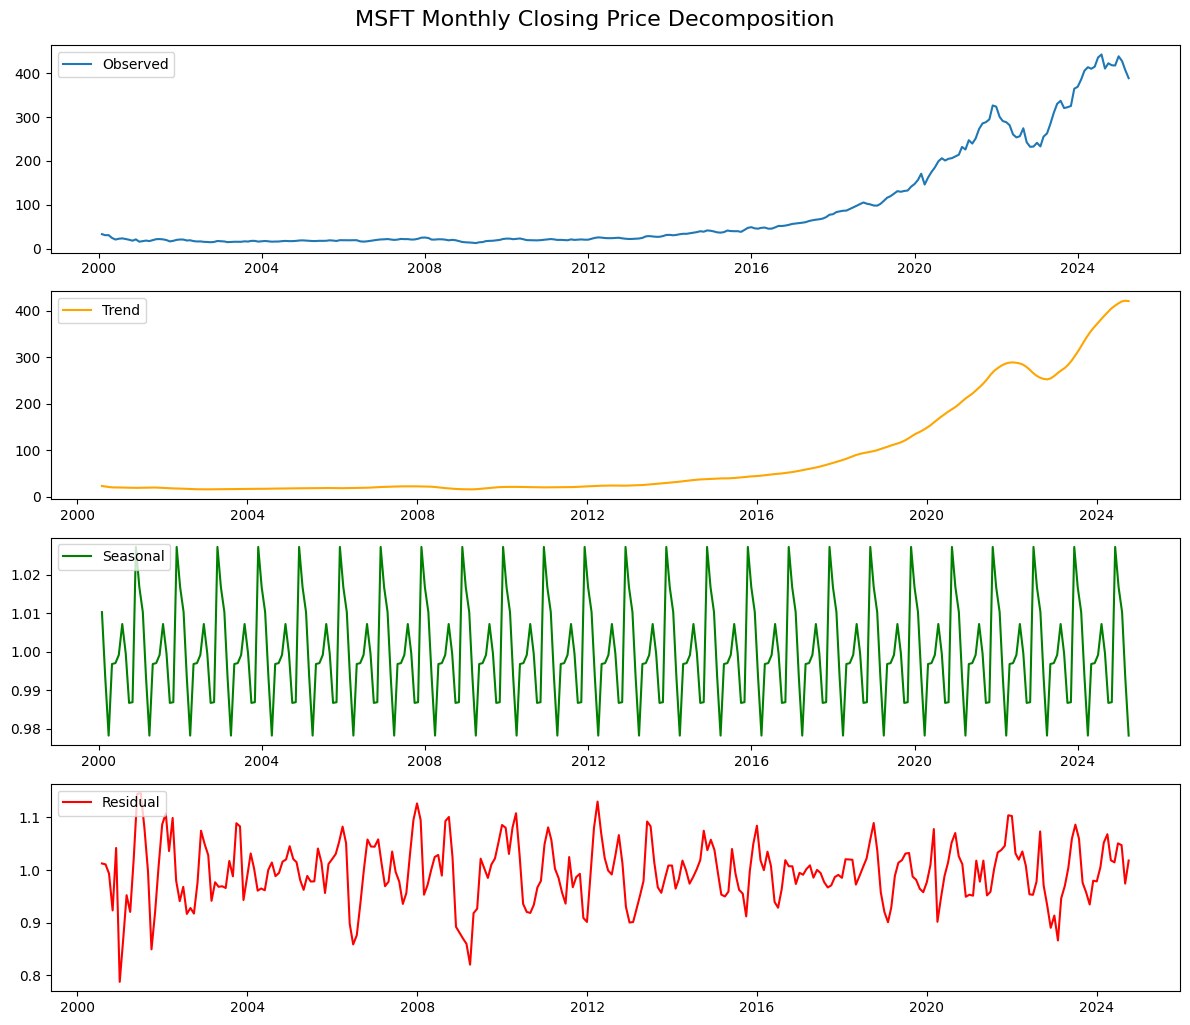

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Load the CSV (make sure the path is correct)
file_path = r"D:\My Projects_BU_Snehal\Time-Series-Model\MSFT_Historical_Data.csv"
df = pd.read_csv(file_path, parse_dates=['Date'])
df = df[['Date', 'Close']].dropna()
df.set_index('Date', inplace=True)

# 2. Resample to monthly average
monthly_df = df['Close'].resample('M').mean()

# 3. Decompose the time series
result = seasonal_decompose(monthly_df, model='multiplicative', period=12)

# 4. Plot the decomposition
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.suptitle("MSFT Monthly Closing Price Decomposition", fontsize=16, y=1.02)
plt.show()